### Importing the necessary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
from datetime import datetime

In [4]:
# Reading the "fullVisitorId" as string, as suggested in Kaggle
df = pd.read_csv('cleaned_data.csv', dtype={'fullVisitorId': str})

### Unique Visitor IDs

In [5]:
len(df.fullVisitorId.unique())

714167

### Columns in the Dataset

In [6]:
df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'device.browser',
       'device.operatingSystem', 'device.isMobile', 'device.deviceCategory',
       'geoNetwork.continent', 'geoNetwork.subContinent', 'geoNetwork.country',
       'geoNetwork.region', 'geoNetwork.metro', 'geoNetwork.city',
       'geoNetwork.networkDomain', 'totals.hits', 'totals.pageviews',
       'totals.bounces', 'totals.newVisits', 'totals.transactionRevenue',
       'trafficSource.campaign', 'trafficSource.source',
       'trafficSource.medium', 'trafficSource.keyword',
       'trafficSource.isTrueDirect', 'trafficSource.referralPath'],
      dtype='object')

In [7]:
df['totals.transactionRevenue'].fillna(0,inplace=True)

# Visualizing our Target feature totals.transactionRevenue

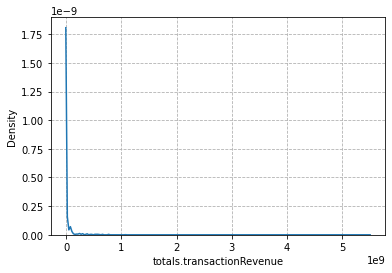

In [8]:
sns.kdeplot(df['totals.transactionRevenue'])
plt.grid(ls='--')

#### Revenue is highly skewed, since very few people actually generate Revenue

In [9]:
n1=len(df[df['totals.transactionRevenue']>0].index)
n2=len(df['totals.transactionRevenue'].index)

print("Out of ",n2," Visits, only ",n1," visits generated Revenue, which means",round((n1/n2)*100,3),"% of visits generated Revenue")

Out of  903653  Visits, only  11396  visits generated Revenue, which means 1.261 % of visits generated Revenue


# channelGrouping

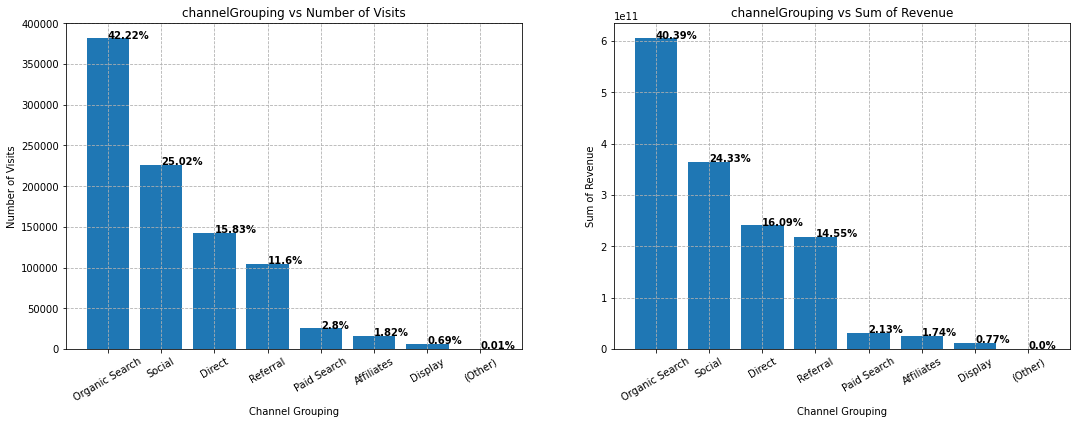

In [200]:
plt.rcParams["figure.figsize"] = (18,6)
#ax=sns.countplot(df['channelGrouping'],order = df['channelGrouping'].value_counts().index)

plt.subplot(121)
cgv=df['channelGrouping'].value_counts()
x=cgv.index
y=cgv.values
#with plt.style.context('seaborn-poster'):
plt.bar(x,height=y)
plt.grid(ls="--")
plt.title('channelGrouping vs Number of Visits')
plt.xticks(rotation=30)
for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y)),2))+"%",size=10,weight="bold")
plt.xlabel('Channel Grouping')
plt.ylabel('Number of Visits')
###################################################################################

plt.subplot(122)
cg=df.groupby('channelGrouping').sum()['totals.transactionRevenue'].sort_values(ascending=False)   
x=list(cg.index)
y=list(cg.values)
plt.bar(x,height=y)
for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y)),2))+"%",size=10,weight="bold")
plt.grid(ls="--")
plt.title("channelGrouping vs Sum of Revenue")
plt.xticks(rotation=30)
plt.xlabel('Channel Grouping')
plt.ylabel('Sum of Revenue')
plt.show()

#### Most of the people who visit the store (42.22%) are through Organic Search, which Indicates that most of visits happen without the involvment of Social Media, Referral, and Paid Search etc.
#### The same Category contributes to the maximum Revenue


## device.browser

In [201]:
df['device.browser'].value_counts()

Chrome                      607420
Safari                      205664
Firefox                      34676
Internet Explorer            17528
Edge                          9592
Android Webview               6634
Safari (in-app)               5869
Opera                         5029
Opera Mini                    4913
UC Browser                    1763
YaBrowser                     1656
Coc Coc                        615
Amazon Silk                    520
Android Browser                497
Mozilla Compatible Agent       354
BlackBerry                     213
MRCHROME                       189
Nintendo Browser               166
Maxthon                        117
Nokia Browser                   71
Puffin                          48
Lunascape                       24
IE with Chrome Frame            24
ADM                             24
ThumbSniper                     24
LYF_LS_4002_12                  23
Name: device.browser, dtype: int64

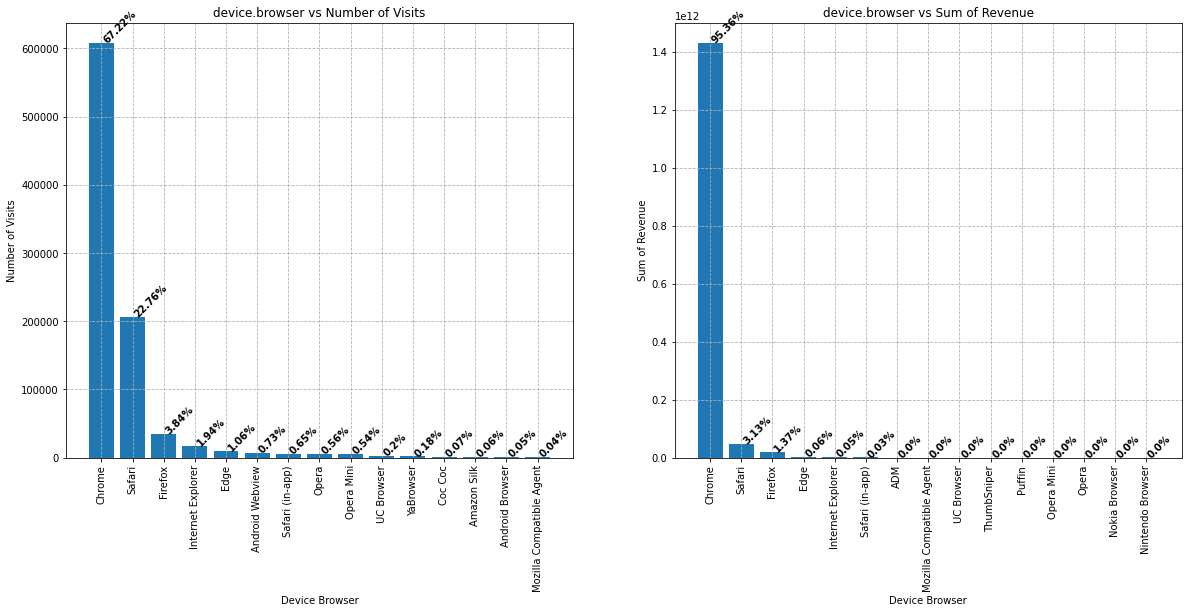

In [281]:
plt.rcParams["figure.figsize"] = (20,8)

plt.subplot(121)
x=df['device.browser'].value_counts().index[:15]
y=df['device.browser'].value_counts().values[:15]
y1=df['device.browser'].value_counts().values # to calculate the percentage

plt.rcParams["figure.figsize"] = (20,8)
with plt.style.context("seaborn-poster"):
    plt.bar(x=x,height=y)
    
for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y1)),2))+"%",size=10,weight="bold",rotation=45)
plt.xticks(rotation=90)
plt.title("device.browser vs Number of Visits")
plt.xlabel('Device Browser')
plt.ylabel('Number of Visits')
plt.grid(ls="--")

#######################################


plt.subplot(122)
db=df.groupby('device.browser').sum()['totals.transactionRevenue'].sort_values(ascending=False)   
x=list(db.index)[:15]
y=list(db.values)[:15]
y1=list(db.values) # to calculate the percentage
plt.bar(x,height=y)
for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y1)),2))+"%",size=10,weight="bold",rotation=45)
plt.grid(ls="--")
plt.title("device.browser vs Sum of Revenue")
plt.xticks(rotation=90)
plt.xlabel('Device Browser')
plt.ylabel('Sum of Revenue')
plt.savefig('Device_Browser',dpi=800)
plt.show()

#### Most of the Visits are made through Chrome and Safari. The most obvious reason behind it can be their popularity. Other reason could be that browser like Chrome and Safari support all the features of the store website, giving a better experience to the Customers.
#### 90.06% of the revenue is generated from Chrome Browser

## device.operatingSystem

In [203]:
df['device.operatingSystem'].value_counts()

Windows          355752
Macintosh        268304
Android          113554
iOS              101097
Linux             33036
Chrome OS         25963
(not set)          3655
Windows Phone      1511
BlackBerry          213
Samsung             165
Nintendo Wii        143
Xbox                119
Firefox OS          118
Nintendo WiiU        23
Name: device.operatingSystem, dtype: int64

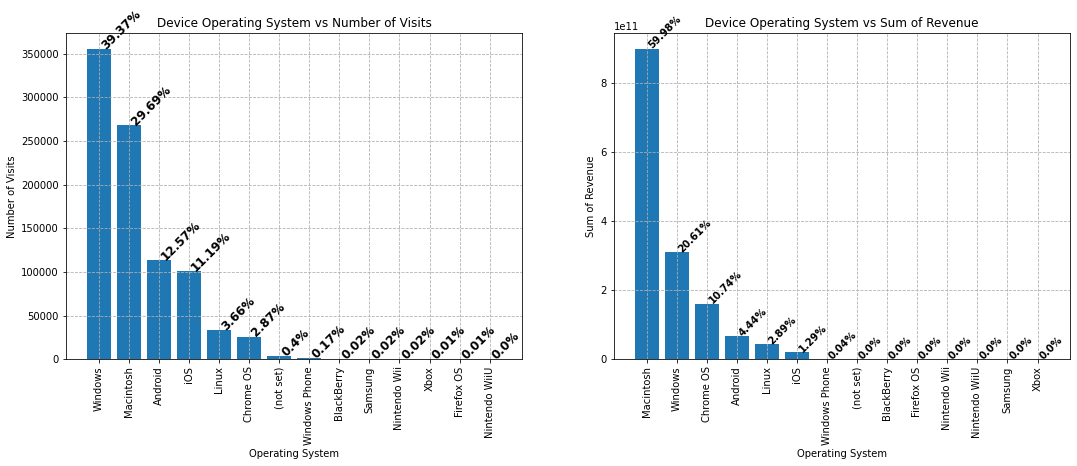

In [11]:
plt.rcParams["figure.figsize"] = (18,6)

plt.subplot(121)
x=df['device.operatingSystem'].value_counts().index
y=df['device.operatingSystem'].value_counts().values


with plt.style.context("seaborn-poster"):
    plt.bar(x=x,height=y)
#print("Here (Not Set) stands for the Missing information")   
for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y)),2))+"%",size=12,weight="bold",rotation=45)
    
plt.xlabel('Operating System')
plt.ylabel('Number of Visits')
plt.xticks(rotation=90)
plt.grid(ls="--")
plt.title("Device Operating System vs Number of Visits")


plt.subplot(122)
db=df.groupby('device.operatingSystem').sum()['totals.transactionRevenue'].sort_values(ascending=False)   
x=list(db.index)
y=list(db.values)
y1=list(db.values) # to calculate the percentage
plt.bar(x,height=y)
for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y1)),2))+"%",size=10,weight="bold",rotation=45)
plt.grid(ls="--")
plt.title("Device Operating System vs Sum of Revenue")
plt.xticks(rotation=90)
plt.xlabel('Operating System')
plt.ylabel('Sum of Revenue')
plt.savefig('Device_OS.jpg',bbox_inches = 'tight')
plt.show()

#### Most of the Visits are made by Windows, Macintosh and Android users. Again the most obvious reason behind it can be their popularity. Other reason could be that they provide a better experiece to the user.
#### 54.89% of the revenue is generated by Macintosh users alnoe


## device.isMobile

In [205]:
df['device.isMobile'].value_counts()

False    682300
True     221353
Name: device.isMobile, dtype: int64

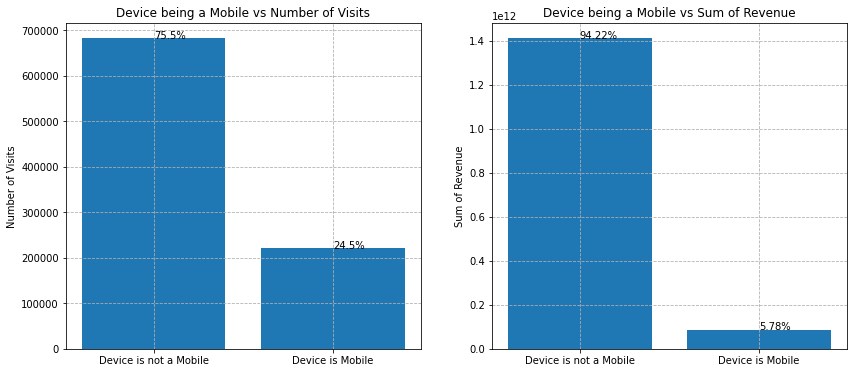

In [206]:
x=df['device.isMobile'].value_counts().index
y=df['device.isMobile'].value_counts().values

plt.rcParams["figure.figsize"] = (14,6)
#with plt.style.context("seaborn-poster"):
plt.subplot(121)
plt.bar(x=x,height=y)
for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y)),2))+"%",size=10)

plt.xticks([0,1],["Device is not a Mobile","Device is Mobile"])
plt.ylabel('Number of Visits')
plt.title('Device being a Mobile vs Number of Visits')
plt.grid(ls="--")

plt.subplot(122)
db=df.groupby('device.isMobile').sum()['totals.transactionRevenue'].sort_values(ascending=False)   
x=list(db.index)
y=list(db.values)
y1=list(db.values) # to calculate the percentage
plt.bar(x,height=y)
for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y1)),2))+"%",size=10)
plt.grid(ls="--")
plt.title("Device being a Mobile vs Sum of Revenue")

plt.xticks([0,1],["Device is not a Mobile","Device is Mobile"])

plt.ylabel('Sum of Revenue')
plt.show()

#### Only 24.5% of people visit the store through Mobile. Some of the reasons behind this can be - 
* The Mobile dosent has a very user friendly UI
* The people who are serious about buying whould prefer to watch it on a bigger screen
#### And prortionally, only 9.14% revenue is generated through Mobile Device

## device.deviceCategory

In [207]:
df['device.deviceCategory'].value_counts()

desktop    682185
mobile     194482
tablet      26986
Name: device.deviceCategory, dtype: int64

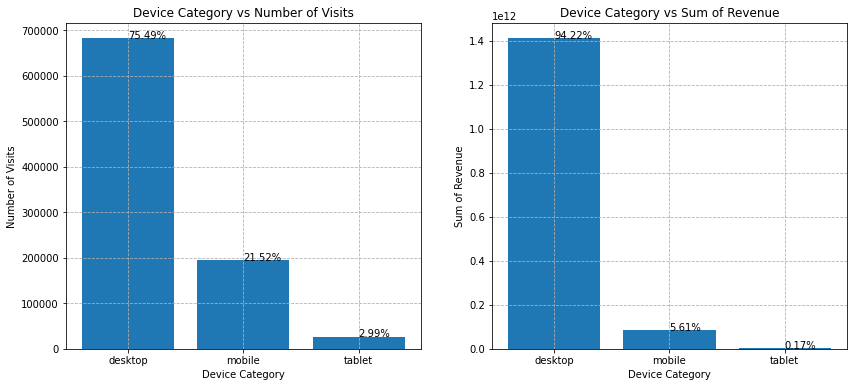

In [12]:
x=df['device.deviceCategory'].value_counts().index
y=df['device.deviceCategory'].value_counts().values

plt.rcParams["figure.figsize"] = (14,6)
plt.subplot(121)
plt.bar(x=x,height=y)

for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y)),2))+"%",size=10)

plt.grid(ls="--")
plt.xlabel('Device Category')
plt.ylabel('Number of Visits')
plt.title('Device Category vs Number of Visits')

plt.subplot(122)
db=df.groupby('device.deviceCategory').sum()['totals.transactionRevenue'].sort_values(ascending=False)   
x=list(db.index)
y=list(db.values)
y1=list(db.values) # to calculate the percentage
plt.bar(x,height=y)
for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y1)),2))+"%",size=10)
plt.grid(ls="--")
plt.title("Device Category vs Sum of Revenue")
plt.xlabel('Device Category')
#plt.xticks([0,1],["Device is not a Mobile","Device is Mobile"])

plt.ylabel('Sum of Revenue')
plt.savefig('Device_Category.jpg',bbox_inches = 'tight' )
plt.show()

#### 90.86% of the revenue is generated from Desktop Device.
#### Tablet after having 2.99% of the Visits, it generates only 0.76% of the total Revenue

## geoNetwork.continent

In [209]:
df['geoNetwork.continent'].value_counts()

Americas     427655
Asia         250440
Europe       197726
Africa        14007
Oceania       12766
(not set)      1059
Name: geoNetwork.continent, dtype: int64

Here (Not Set) stands for the Missing information


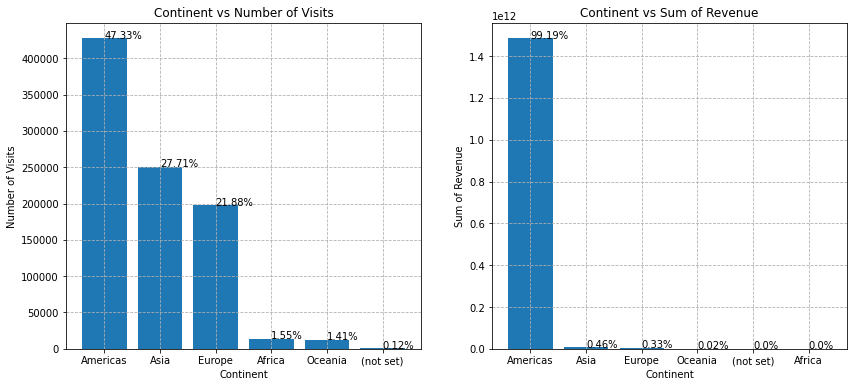

In [13]:
x=df['geoNetwork.continent'].value_counts().index
y=df['geoNetwork.continent'].value_counts().values

plt.rcParams["figure.figsize"] = (14,6)
plt.subplot(121)
with plt.style.context("seaborn-poster"):
    plt.bar(x=x,height=y)

for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y)),2))+"%",size=10)
print("Here (Not Set) stands for the Missing information")   
plt.xlabel('Continent')
plt.ylabel('Number of Visits')
plt.title('Continent vs Number of Visits')

plt.grid(ls="--")

plt.subplot(122)
db=df.groupby('geoNetwork.continent').sum()['totals.transactionRevenue'].sort_values(ascending=False)   
x=list(db.index)
y=list(db.values)
y1=list(db.values) # to calculate the percentage
plt.bar(x,height=y)
for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y1)),2))+"%",size=10)
plt.grid(ls="--")
plt.title("Continent vs Sum of Revenue")
plt.xlabel('Continent')
plt.ylabel('Sum of Revenue')
plt.savefig('Continent.jpg',bbox_inches = 'tight' )

plt.show()

#### America produces 98.39% of the total revenue., which is far more than any other Continent. Hence, if the user is from America, then there will be high chances of making the payment.

## geoNetwork.subContinent

In [211]:
df['geoNetwork.subContinent'].value_counts()

Northern America    362194
Southeast Asia      107650
Western Europe       57322
Southern Asia        56618
Eastern Europe       55613
Northern Europe      52859
South America        46831
Western Asia         43359
Eastern Asia         41290
Southern Europe      31932
Central America      16482
Australasia          12696
Northern Africa       7855
Western Africa        2188
Caribbean             2148
Southern Africa       1801
Eastern Africa        1739
Central Asia          1523
(not set)             1059
Middle Africa          424
Melanesia               70
Name: geoNetwork.subContinent, dtype: int64

Here (Not Set) stands for the Missing information


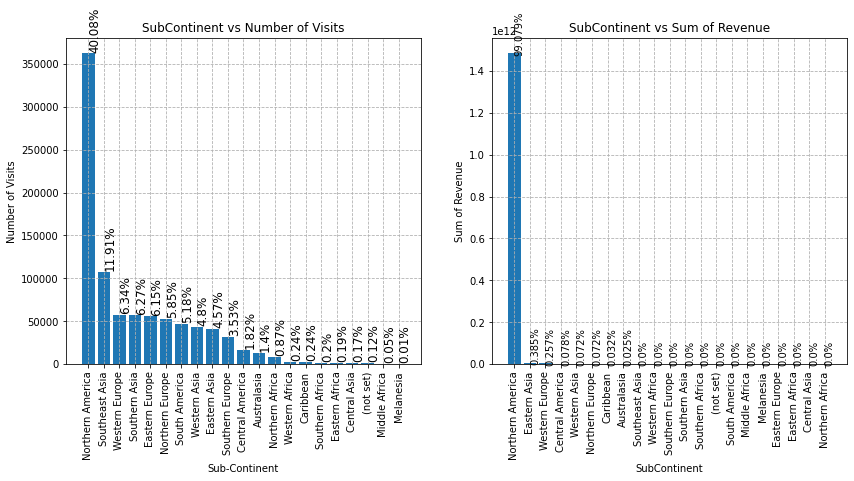

In [212]:
x=df['geoNetwork.subContinent'].value_counts().index
y=df['geoNetwork.subContinent'].value_counts().values

#plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["figure.figsize"] = (14,6)
plt.subplot(121)
with plt.style.context("seaborn-poster"):
    plt.bar(x=x,height=y)

for i,j in zip(x,y):
    plt.text(i,j+5000,str(round(100*(j/sum(y)),2))+"%",size=12,rotation=90)
print("Here (Not Set) stands for the Missing information")   
plt.xticks(rotation=90)
plt.xlabel('Sub-Continent')
plt.ylabel('Number of Visits')
plt.title('SubContinent vs Number of Visits')
plt.grid(ls="--")

plt.subplot(122)
db=df.groupby('geoNetwork.subContinent').sum()['totals.transactionRevenue'].sort_values(ascending=False)   
x=list(db.index)
y=list(db.values)
y1=list(db.values) # to calculate the percentage
plt.bar(x,height=y)
for i,j in zip(x,y):
    plt.text(i,j+5000,str(round(100*(j/sum(y1)),3))+"%",size=10,rotation=90)
plt.grid(ls="--")
plt.title("SubContinent vs Sum of Revenue")
plt.xlabel('SubContinent')
plt.ylabel('Sum of Revenue')
plt.xticks(rotation=90)

plt.show()

#### Northern America contributes to 97.98% of the total Revenue
#### Even though other Sub Continents have considerable amount of visits, very less revenue is generated from them.

## geoNetwork.country

In [213]:
df['geoNetwork.country'].value_counts()

United States     338788
India              49208
Vietnam            43307
United Kingdom     34444
Thailand           28385
                   ...  
Monaco                23
Swaziland             23
Curaçao               23
Iran                  23
Martinique            23
Name: geoNetwork.country, Length: 162, dtype: int64

Here (Not Set) stands for the Missing information


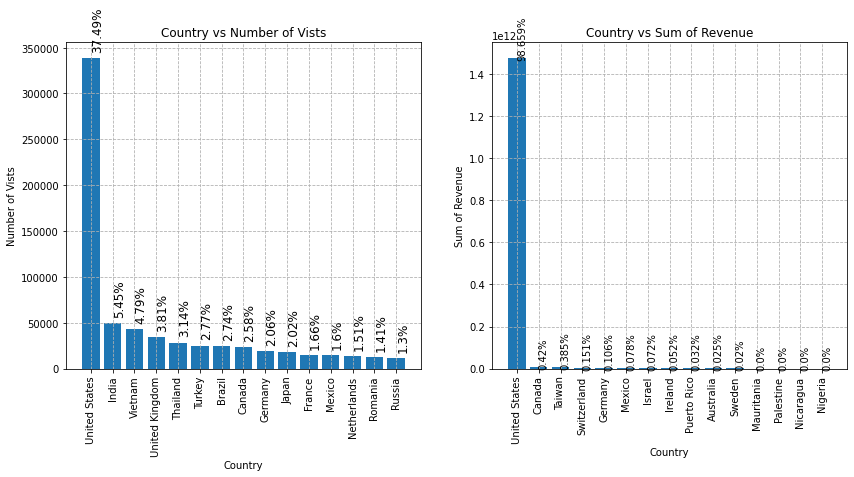

In [14]:
x=df['geoNetwork.country'].value_counts().index[:15]
y=df['geoNetwork.country'].value_counts().values[:15]
y1=df['geoNetwork.country'].value_counts().values
#plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["figure.figsize"] = (14,6)
plt.subplot(121)
with plt.style.context("seaborn-poster"):
    plt.bar(x=x,height=y)

for i,j in zip(x,y):
    plt.text(i,j+10000,str(round(100*(j/sum(y1)),2))+"%",size=12,rotation=90)
print("Here (Not Set) stands for the Missing information")   
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Vists')
plt.title('Country vs Number of Vists')
plt.grid(ls="--")

plt.subplot(122)
db=df.groupby('geoNetwork.country').sum()['totals.transactionRevenue'].sort_values(ascending=False)   
x=list(db.index)[:15]
y=list(db.values)[:15]
y1=list(db.values) # to calculate the percentage
plt.bar(x,height=y)
for i,j in zip(x,y):
    plt.text(i,j+5000,str(round(100*(j/sum(y1)),3))+"%",size=10,rotation=90)
plt.grid(ls="--")
plt.title("Country vs Sum of Revenue")
plt.xlabel('Country')
plt.ylabel('Sum of Revenue')
plt.xticks(rotation=90)
plt.savefig('Country.jpg',bbox_inches = 'tight' )
plt.show()

#### United states Dominates with more number of Visits as well as Revenue. United States generates 96.98% of revenue. The reason might be that most of the products sold suits the taste of US people.

## geoNetwork.metro

In [215]:
df['geoNetwork.metro'].value_counts()

not available in demo dataset        503404
(not set)                            219928
San Francisco-Oakland-San Jose CA     93214
New York NY                           25015
London                                10906
Los Angeles CA                         9662
Chicago IL                             7721
Seattle-Tacoma WA                      7066
Austin TX                              2895
Roanoke-Lynchburg VA                   2727
Atlanta GA                             2457
Detroit MI                             2257
Houston TX                             1997
Columbus OH                            1866
Dallas-Ft. Worth TX                    1746
Washington DC (Hagerstown MD)          1555
Boston MA-Manchester NH                1424
San Diego CA                           1401
Portland OR                            1002
Pittsburgh PA                           799
Charlotte NC                            680
North West                              575
Philadelphia PA                 

Here (Not Set) stands for the Missing information
And similarly we will have to treat (not available in demo dataset ) as missing information as well


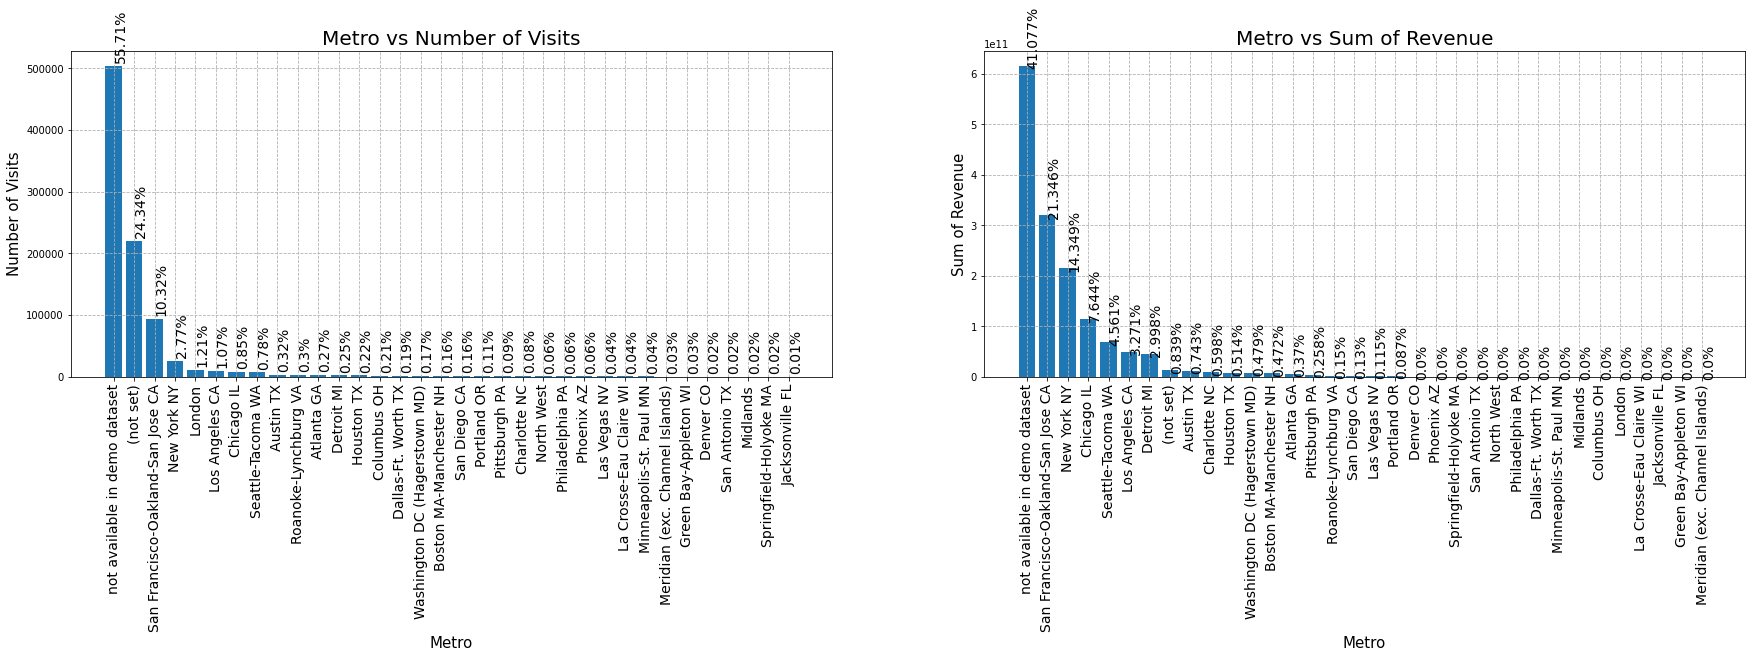

In [216]:
x=df['geoNetwork.metro'].value_counts().index
y=df['geoNetwork.metro'].value_counts().values

plt.rcParams["figure.figsize"] = (30,6)
plt.subplot(121)
with plt.style.context("seaborn-poster"):
    plt.bar(x=x,height=y)

for i,j in zip(x,y):
    plt.text(i,j+10000,str(round(100*(j/sum(y)),2))+"%",size=14,rotation=90)
print("Here (Not Set) stands for the Missing information")  
print("And similarly we will have to treat (not available in demo dataset ) as missing information as well")
plt.xticks(rotation=90)
plt.xlabel('Metro',size=15)
plt.ylabel('Number of Visits',size=15)
plt.xticks(size=14)
plt.grid(ls="--")
plt.title("Metro vs Number of Visits",size=20)

plt.subplot(122)
db=df.groupby('geoNetwork.metro').sum()['totals.transactionRevenue'].sort_values(ascending=False)   
x=list(db.index)
y=list(db.values)
y1=list(db.values) # to calculate the percentage
plt.bar(x,height=y)
for i,j in zip(x,y):
    plt.text(i,j+1000,str(round(100*(j/sum(y1)),3))+"%",size=14,rotation=90)
plt.grid(ls="--")
plt.title("Metro vs Sum of Revenue",size=20)
plt.xlabel('Metro',size=15)
plt.ylabel('Sum of Revenue',size=15)
plt.xticks(rotation=90)
plt.xticks(size=14)
plt.show()

#### In this case 55.17% and 24.34% of information is unavailable.Out of the available data, "San Franciscon Oakland-San Jose CA" generates most of the revenue

## geoNetwork.city

In [217]:
df['geoNetwork.city'].value_counts()

not available in demo dataset    503404
Mountain View                     41161
(not set)                         32279
New York                          24871
San Francisco                     19183
                                  ...  
Canterbury                          120
Beijing                             120
Jacksonville                        120
Bothell                              69
Menlo Park                           46
Name: geoNetwork.city, Length: 208, dtype: int64

Here (Not Set) stands for the Missing information
And similarly we will have to treat (not available in demo dataset ) as missing information as well


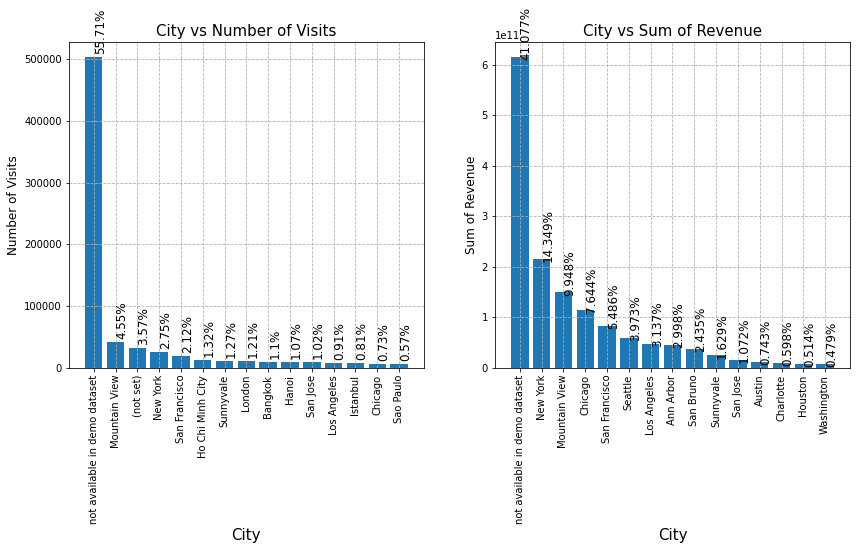

In [218]:
x=df['geoNetwork.city'].value_counts().index[:15]
y=df['geoNetwork.city'].value_counts().values[:15]
y1=df['geoNetwork.city'].value_counts()
#plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["figure.figsize"] = (14,6)
plt.subplot(121)
#with plt.style.context("seaborn-poster"):
plt.bar(x=x,height=y)

for i,j in zip(x,y):
    plt.text(i,j+10000,str(round(100*(j/sum(y1)),2))+"%",size=12,rotation=90)
print("Here (Not Set) stands for the Missing information")  
print("And similarly we will have to treat (not available in demo dataset ) as missing information as well")
plt.xticks(rotation=90)
plt.title("City vs Number of Visits",size=15)
plt.xlabel('City',size=15)
plt.ylabel('Number of Visits',size=12)
plt.grid(ls="--")

plt.subplot(122)
db=df.groupby('geoNetwork.city').sum()['totals.transactionRevenue'].sort_values(ascending=False)   
x=list(db.index)[:15]
y=list(db.values)[:15]
y1=list(db.values) # to calculate the percentage
plt.bar(x,height=y)
for i,j in zip(x,y):
    plt.text(i,j+1000,str(round(100*(j/sum(y1)),3))+"%",size=12,rotation=90)
plt.grid(ls="--")
plt.title("City vs Sum of Revenue",size=15)
plt.xlabel('City',size=15)
plt.ylabel('Sum of Revenue',size=12)
plt.xticks(rotation=90)
#plt.yticks(y)
plt.show()

#### Here 55.71% of data is missing. Countries like New York and Mountain view have small numbers of Visits, but has good amount of Revenue Generated

## geoNetwork.networkDomain

In [219]:
df['geoNetwork.networkDomain'].value_counts()

(not set)                 230607
unknown.unknown           160764
comcast.net                24636
ttnet.com.tr               17131
rr.com                     13423
                           ...  
pinnaclelandscape.com         23
axa-assistance.sg             22
ent.tw                        21
hesenergy.net                 21
foothillsbroadband.com         1
Name: geoNetwork.networkDomain, Length: 3692, dtype: int64

Here (Not Set) stands for the Missing information
And similarly we will have to treat (not available in demo dataset ) as missing information as well


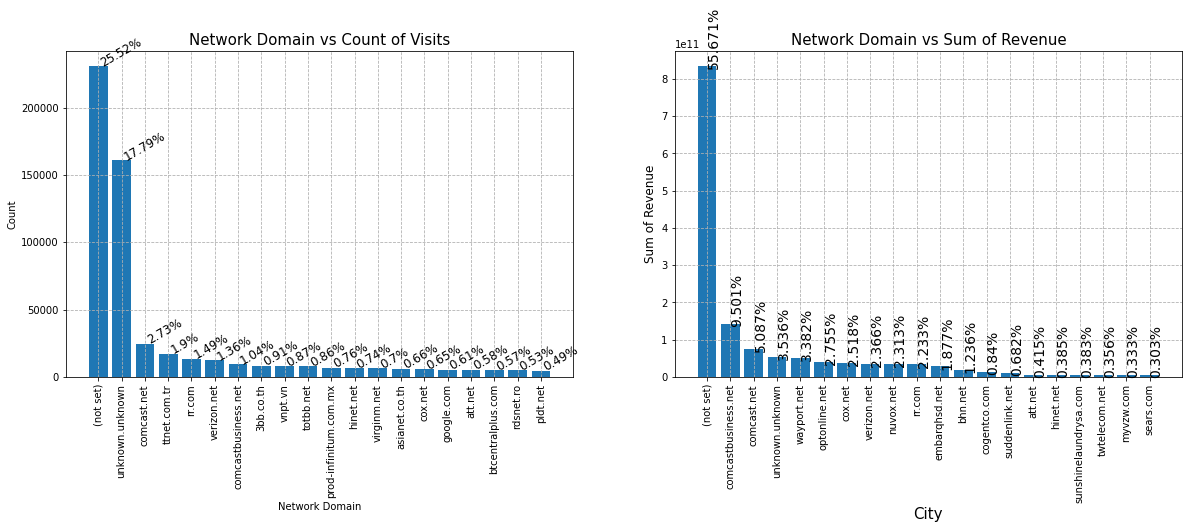

In [220]:
x=df['geoNetwork.networkDomain'].value_counts().index[:20]
y=df['geoNetwork.networkDomain'].value_counts().values[:20]
y1=df['geoNetwork.networkDomain'].value_counts().values

plt.rcParams["figure.figsize"] = (20,6)
plt.subplot(121)
with plt.style.context("seaborn-poster"):
    plt.bar(x=x,height=y)

for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y1)),2))+"%",size=12,rotation=30)
print("Here (Not Set) stands for the Missing information")  
print("And similarly we will have to treat (not available in demo dataset ) as missing information as well")
plt.title("Network Domain vs Count of Visits",size=15)
plt.xticks(rotation=90)
plt.xlabel('Network Domain')
plt.ylabel('Count')
plt.grid(ls="--")

plt.subplot(122)
db=df.groupby('geoNetwork.networkDomain').sum()['totals.transactionRevenue'].sort_values(ascending=False)   
x=list(db.index)[:20]
y=list(db.values)[:20]
y1=list(db.values) # to calculate the percentage
plt.bar(x,height=y)
for i,j in zip(x,y):
    plt.text(i,j+1000,str(round(100*(j/sum(y1)),3))+"%",size=14,rotation=90)
plt.grid(ls="--")
plt.title("Network Domain vs Sum of Revenue",size=15)
plt.xlabel('City',size=15)
plt.ylabel('Sum of Revenue',size=12)
plt.xticks(rotation=90)
#plt.xticks(size=14)
plt.show()

#### 25.52% of data regarding Network Domain is missing and 61.25% of Revenue is generated by the unknown source.
#### Next source which generates high source of Revenue is comcast.net

## totals.hits

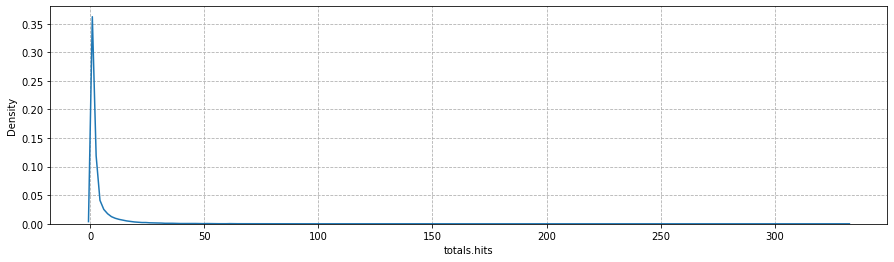

In [221]:
plt.rcParams["figure.figsize"] = (15,4)
#with plt.style.context("seaborn-poster"):
sns.kdeplot(df['totals.hits'])
plt.grid(ls='--')

In [222]:
print("0 percentile value of totals.hits",np.percentile(df['totals.hits'],0))
print("25 percentile value of totals.hits",np.percentile(df['totals.hits'],25))
print("50 percentile value of totals.hits",np.percentile(df['totals.hits'],50))
print("75 percentile value of totals.hits",np.percentile(df['totals.hits'],75))
print("90 percentile value of totals.hits",np.percentile(df['totals.hits'],90))
print("100 percentile value of totals.hits",np.percentile(df['totals.hits'],100))

0 percentile value of totals.hits 1.0
25 percentile value of totals.hits 1.0
50 percentile value of totals.hits 2.0
75 percentile value of totals.hits 4.0
90 percentile value of totals.hits 10.0
100 percentile value of totals.hits 331.0


In [223]:
for i in range(90,101):
    print(i,"percentile value of totals.hits",np.percentile(df['totals.hits'],i))

90 percentile value of totals.hits 10.0
91 percentile value of totals.hits 11.0
92 percentile value of totals.hits 12.0
93 percentile value of totals.hits 14.0
94 percentile value of totals.hits 15.0
95 percentile value of totals.hits 17.0
96 percentile value of totals.hits 20.0
97 percentile value of totals.hits 24.0
98 percentile value of totals.hits 30.0
99 percentile value of totals.hits 42.0
100 percentile value of totals.hits 331.0


In [224]:
i=99
while i<100:
    print(i,"percentile value of totals.hits",np.percentile(df['totals.hits'],i))
    i+=0.1

99 percentile value of totals.hits 42.0
99.1 percentile value of totals.hits 44.0
99.19999999999999 percentile value of totals.hits 46.0
99.29999999999998 percentile value of totals.hits 48.0
99.39999999999998 percentile value of totals.hits 51.0
99.49999999999997 percentile value of totals.hits 55.0
99.59999999999997 percentile value of totals.hits 61.0
99.69999999999996 percentile value of totals.hits 67.0
99.79999999999995 percentile value of totals.hits 77.0
99.89999999999995 percentile value of totals.hits 97.0
99.99999999999994 percentile value of totals.hits 331.0


C:\Users\dhira\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


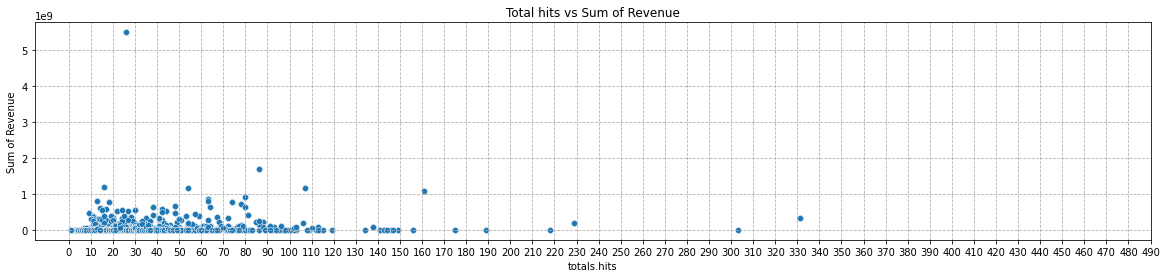

In [225]:
plt.rcParams["figure.figsize"] = (20,4)
sns.scatterplot(df['totals.hits'],df['totals.transactionRevenue'])
plt.xticks(list(range(0,500,10)))
plt.ylabel("Sum of Revenue")
#plt.yticks(list(range(0,24,1)))
plt.grid(ls='--')
plt.title('Total hits vs Sum of Revenue')
plt.savefig('Total_Hits.jpg')
plt.show()

#### totals.hits is a very useful information. From the scatter plot it can be seen that in all the cases where the number of hits is less than 5, the revenue generated is 0. A very small portion of people have totals.hits>97

## totals.pageviews

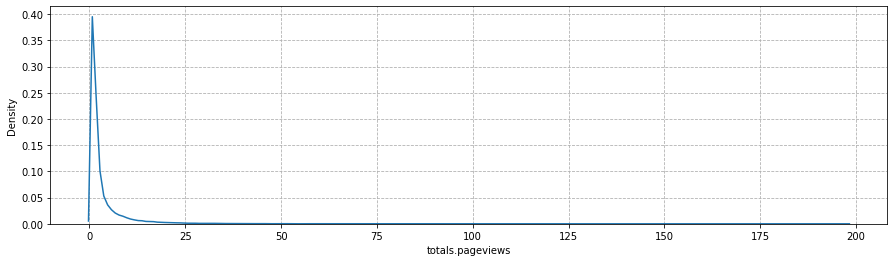

In [226]:
plt.rcParams["figure.figsize"] = (15,4)
#with plt.style.context("seaborn-poster"):
sns.kdeplot(df['totals.pageviews'])
plt.grid(ls='--')

In [227]:
df['totals.pageviews'].fillna(df['totals.pageviews'].median(),inplace=True)

In [228]:
print("0 percentile value of totals.pageviews",np.percentile(df['totals.pageviews'],0))
print("25 percentile value of totals.pageviews",np.percentile(df['totals.pageviews'],25))
print("50 percentile value of totals.pageviews",np.percentile(df['totals.pageviews'],50))
print("75 percentile value of totals.pageviews",np.percentile(df['totals.pageviews'],75))
print("90 percentile value of totals.pageviews",np.percentile(df['totals.pageviews'],90))
print("100 percentile value of totals.pageviews",np.percentile(df['totals.pageviews'],100))

0 percentile value of totals.pageviews 1.0
25 percentile value of totals.pageviews 1.0
50 percentile value of totals.pageviews 2.0
75 percentile value of totals.pageviews 3.0
90 percentile value of totals.pageviews 8.0
100 percentile value of totals.pageviews 197.0


In [229]:
for i in range(90,101):
    print(i,"percentile value of totals.pageviews",np.percentile(df['totals.pageviews'],i))

90 percentile value of totals.pageviews 8.0
91 percentile value of totals.pageviews 9.0
92 percentile value of totals.pageviews 10.0
93 percentile value of totals.pageviews 11.0
94 percentile value of totals.pageviews 12.0
95 percentile value of totals.pageviews 14.0
96 percentile value of totals.pageviews 16.0
97 percentile value of totals.pageviews 18.0
98 percentile value of totals.pageviews 23.0
99 percentile value of totals.pageviews 31.0
100 percentile value of totals.pageviews 197.0


In [230]:
i=99
while i<100:
    print(i,"percentile value of totals.pageviews ",np.percentile(df['totals.pageviews'],i))
    i+=0.1

99 percentile value of totals.pageviews  31.0
99.1 percentile value of totals.pageviews  32.0
99.19999999999999 percentile value of totals.pageviews  33.0
99.29999999999998 percentile value of totals.pageviews  35.0
99.39999999999998 percentile value of totals.pageviews  38.0
99.49999999999997 percentile value of totals.pageviews  40.0
99.59999999999997 percentile value of totals.pageviews  44.0
99.69999999999996 percentile value of totals.pageviews  48.043999999645166
99.79999999999995 percentile value of totals.pageviews  56.0
99.89999999999995 percentile value of totals.pageviews  69.0
99.99999999999994 percentile value of totals.pageviews  197.0


C:\Users\dhira\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


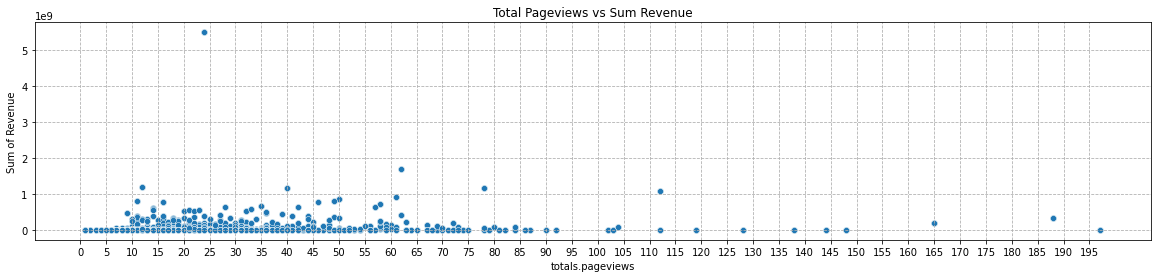

In [231]:
plt.rcParams["figure.figsize"] = (20,4)
sns.scatterplot(df['totals.pageviews'],df['totals.transactionRevenue'])
plt.xticks(list(range(0,200,5)))
plt.grid(ls='--')
plt.ylabel("Sum of Revenue")
plt.title('Total Pageviews vs Sum Revenue')
plt.savefig('Pageviews.jpg')
plt.show()

#### total.pageviews seems to be a very useful feature. From the scatter plot, it can be seen that all the people who have less than 5 pageviews never generated Revenue

## visitNumber

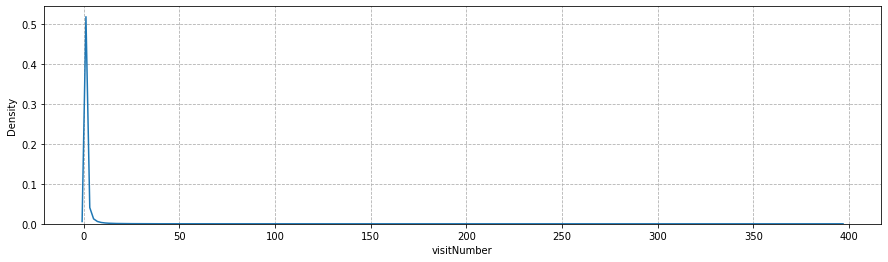

In [232]:
plt.rcParams["figure.figsize"] = (15,4)
#with plt.style.context("seaborn-poster"):
sns.kdeplot(df['visitNumber'])
plt.grid(ls='--')

C:\Users\dhira\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


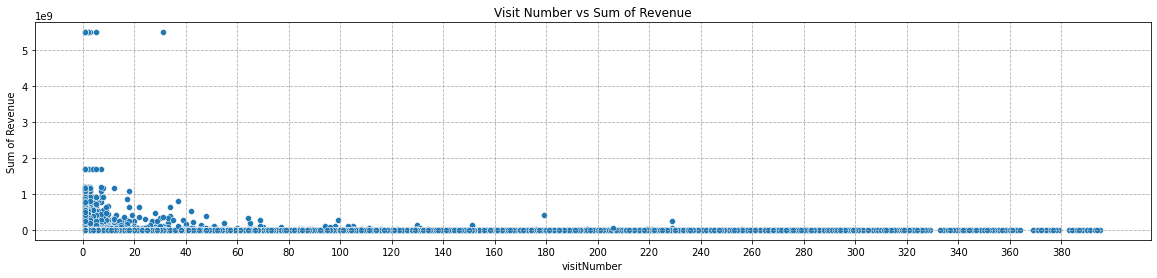

In [233]:
plt.rcParams["figure.figsize"] = (20,4)
sns.scatterplot(df['visitNumber'],df['totals.transactionRevenue'])
plt.xticks(list(range(0,400,20)))
plt.grid(ls='--')
plt.ylabel('Sum of Revenue')
plt.title('Visit Number vs Sum of Revenue')
plt.savefig('Visit_Number.jpg')
plt.show()

In [234]:
print("0 percentile value of visitNumber",np.percentile(df['visitNumber'],0))
print("25 percentile value of visitNumber",np.percentile(df['visitNumber'],25))
print("50 percentile value of visitNumber",np.percentile(df['visitNumber'],50))
print("75 percentile value of visitNumber",np.percentile(df['visitNumber'],75))
print("90 percentile value of visitNumber",np.percentile(df['visitNumber'],90))
print("100 percentile value of visitNumber",np.percentile(df['visitNumber'],100))

0 percentile value of visitNumber 1.0
25 percentile value of visitNumber 1.0
50 percentile value of visitNumber 1.0
75 percentile value of visitNumber 1.0
90 percentile value of visitNumber 3.0
100 percentile value of visitNumber 395.0


In [235]:
for i in range(90,101):
    print(i,"percentile value of visitNumber",np.percentile(df['visitNumber'],i))

90 percentile value of visitNumber 3.0
91 percentile value of visitNumber 3.0
92 percentile value of visitNumber 3.0
93 percentile value of visitNumber 4.0
94 percentile value of visitNumber 4.0
95 percentile value of visitNumber 5.0
96 percentile value of visitNumber 6.0
97 percentile value of visitNumber 8.0
98 percentile value of visitNumber 11.0
99 percentile value of visitNumber 20.0
100 percentile value of visitNumber 395.0


In [236]:
i=99
while i<100:
    print(i,"percentile value of visitNumber ",np.percentile(df['visitNumber'],i))
    i+=0.1

99 percentile value of visitNumber  20.0
99.1 percentile value of visitNumber  22.0
99.19999999999999 percentile value of visitNumber  25.0
99.29999999999998 percentile value of visitNumber  28.0
99.39999999999998 percentile value of visitNumber  33.0
99.49999999999997 percentile value of visitNumber  41.0
99.59999999999997 percentile value of visitNumber  52.0
99.69999999999996 percentile value of visitNumber  70.04399999964517
99.79999999999995 percentile value of visitNumber  102.0
99.89999999999995 percentile value of visitNumber  150.0
99.99999999999994 percentile value of visitNumber  394.99999999953434


#### visitNumber is also a very useful fetaure. From the scatter plot it can be seen that for all the visitNumber>260, no revenue was generated ever. Very small number of visitors had visit number > 150

## totals.bounces

In [237]:
df['totals.bounces'].unique()

array([ 1., nan])

In [238]:
df['totals.bounces'].fillna(0,inplace=True)

In [239]:
df['totals.bounces'].value_counts()

0.0    457228
1.0    446425
Name: totals.bounces, dtype: int64

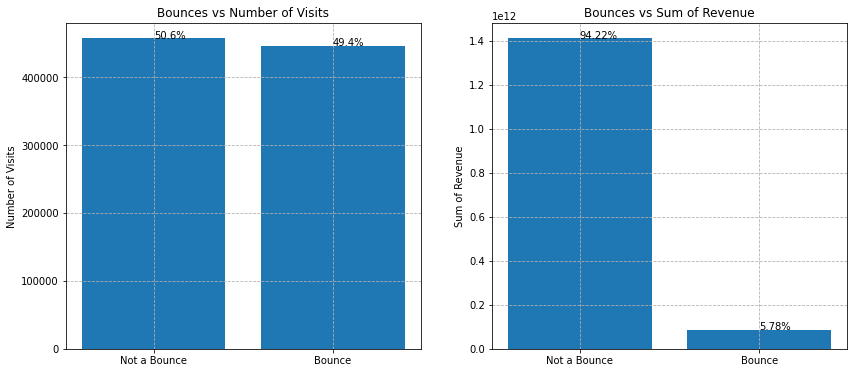

In [240]:
x=df['totals.bounces'].value_counts().index
y=df['totals.bounces'].value_counts().values

plt.rcParams["figure.figsize"] = (14,6)
#with plt.style.context("seaborn-poster"):
plt.subplot(121)
plt.bar(x=x,height=y)
for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y)),2))+"%",size=10)

plt.xticks([0,1],['Not a Bounce','Bounce'])
plt.ylabel('Number of Visits')

plt.title('Bounces vs Number of Visits')
plt.grid(ls="--")

plt.subplot(122)
db=df.groupby('device.isMobile').sum()['totals.transactionRevenue'].sort_values(ascending=False)   
x=list(db.index)
y=list(db.values)
y1=list(db.values) # to calculate the percentage
plt.bar(x,height=y)
for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y1)),2))+"%",size=10)
plt.grid(ls="--")
plt.title('Bounces vs Sum of Revenue')

plt.xticks([0,1],['Not a Bounce','Bounce']) #plt.xticks([0,1],["Device is not a Mobile","Device is Mobile"])

plt.ylabel('Sum of Revenue')
plt.savefig('Bounces.jpg')
plt.show()

#### 49.4% of the visits are Bounced visits. 90.86% of revenue is generated from the visit which is not a Bounce.

## totals.newVisits

In [241]:
df['totals.newVisits'].unique()

array([ 1., nan])

In [242]:
df['totals.newVisits'].fillna(0,inplace=True)

In [243]:
df['totals.newVisits'].value_counts()

1.0    709048
0.0    194605
Name: totals.newVisits, dtype: int64

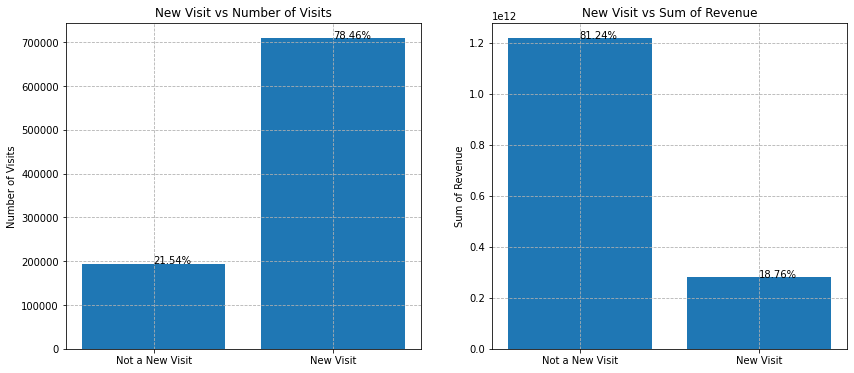

In [244]:
x=df['totals.newVisits'].value_counts().index
y=df['totals.newVisits'].value_counts().values

plt.rcParams["figure.figsize"] = (14,6)
#with plt.style.context("seaborn-poster"):
plt.subplot(121)
plt.bar(x=x,height=y)
for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y)),2))+"%",size=10)

plt.xticks([0,1],['Not a New Visit','New Visit'])
plt.ylabel('Number of Visits')

plt.title('New Visit vs Number of Visits')
plt.grid(ls="--")

plt.subplot(122)
db=df.groupby('totals.newVisits').sum()['totals.transactionRevenue'].sort_values(ascending=False)   
x=list(db.index)
y=list(db.values)
y1=list(db.values) # to calculate the percentage
plt.bar(x,height=y)
for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y1)),2))+"%",size=10)
plt.grid(ls="--")
plt.title('New Visit vs Sum of Revenue')

plt.xticks([0,1],['Not a New Visit','New Visit']) #plt.xticks([0,1],["Device is not a Mobile","Device is Mobile"])

plt.ylabel('Sum of Revenue')
plt.savefig('New_Visit.jpg')
plt.show()

#### Even though 78.46% of the visits are new visits, 66.66% of the revenue is generated from not a new Visit

## trafficSource.campaign

In [245]:
df['trafficSource.campaign'].unique()

array(['(not set)', 'AW - Dynamic Search Ads Whole Site',
       'Data Share Promo', 'AW - Electronics', 'test-liyuhz',
       'AW - Accessories',
       'Retail (DO NOT EDIT owners nophakun and tianyu)', 'AW - Apparel'],
      dtype=object)

In [246]:
len(df.index)

903653

C:\Users\dhira\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Here (Not Set) stands for the Missing information


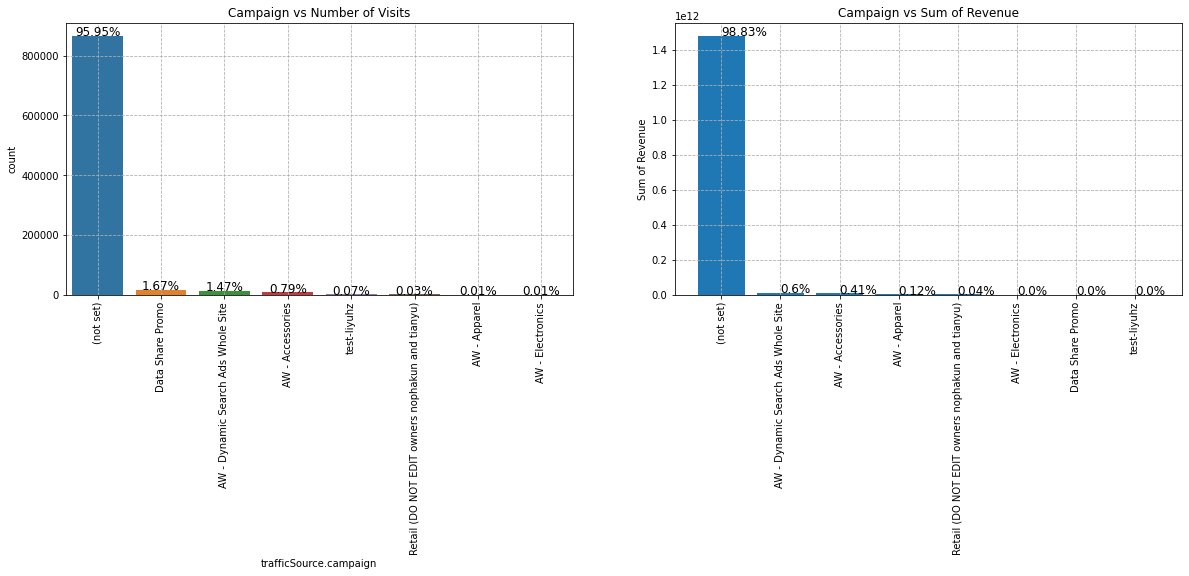

In [247]:
plt.rcParams["figure.figsize"] = (20,5)
#ax=sns.countplot(df['channelGrouping'],order = df['channelGrouping'].value_counts().index)

plt.subplot(121)

with plt.style.context('seaborn-poster'):
    ax=sns.countplot(df['trafficSource.campaign'],order = df['trafficSource.campaign'].value_counts().index)
    #fig = plot_figure(style_label=bmh)
    
for p in ax.patches:
    ax.annotate(f'\n{str(round(100*(p.get_height()/len(df.index)),2))+"%"}', (p.get_x()+0.4, p.get_height()+0.8), ha='center', color='black', size=12)
plt.grid(ls="--")
plt.xticks(rotation=90)
plt.title('Campaign vs Number of Visits')
print("Here (Not Set) stands for the Missing information")   

plt.subplot(122)
db=df.groupby('trafficSource.campaign').sum()['totals.transactionRevenue'].sort_values(ascending=False)   
x=list(db.index)
y=list(db.values)
y1=list(db.values) # to calculate the percentage
plt.bar(x,height=y)
for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y1)),2))+"%",size=12)
plt.grid(ls="--")
plt.title('Campaign vs Sum of Revenue')

plt.xticks(rotation= 90)

plt.ylabel('Sum of Revenue')
plt.show()


#### 95.95% of the data is missing. Hence, this is not a very useful fetaure

## trafficSource.source

In [248]:
df['trafficSource.source'].value_counts()[:15]

google                     377087
youtube.com                255553
(direct)                   129247
mall.googleplex.com         65392
analytics.google.com        15338
Partners                    15131
dfa                          6072
m.facebook.com               4495
google.com                   4261
baidu                        2794
sites.google.com             2597
qiita.com                    2164
siliconvalley.about.com      2163
mail.google.com              1595
reddit.com                   1561
Name: trafficSource.source, dtype: int64

Here (Not Set) stands for the Missing information
And similarly we will have to treat (not available in demo dataset ) as missing information as well


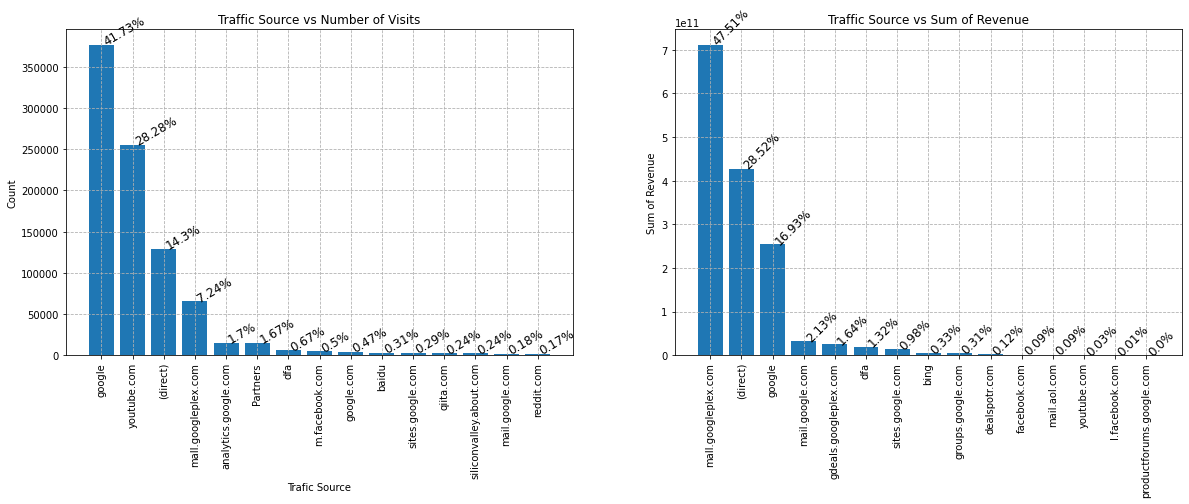

In [249]:
x=df['trafficSource.source'].value_counts().index[:15]
y=df['trafficSource.source'].value_counts().values[:15]
y1=df['trafficSource.source'].value_counts().values

plt.rcParams["figure.figsize"] = (20,6)
plt.subplot(121)
with plt.style.context("seaborn-poster"):
    plt.bar(x=x,height=y)

for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y1)),2))+"%",size=12,rotation=30)
print("Here (Not Set) stands for the Missing information")  
print("And similarly we will have to treat (not available in demo dataset ) as missing information as well")
plt.xticks(rotation=90)
plt.xlabel('Trafic Source')
plt.ylabel('Count')
plt.title('Traffic Source vs Number of Visits')
plt.grid(ls="--")

plt.subplot(122)
db=df.groupby('trafficSource.source').sum()['totals.transactionRevenue'].sort_values(ascending=False)   
x=list(db.index)[:15]
y=list(db.values)[:15]
y1=list(db.values) # to calculate the percentage
plt.bar(x,height=y)
for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y1)),2))+"%",size=12,rotation=45)
plt.grid(ls="--")
plt.title('Traffic Source vs Sum of Revenue')

plt.xticks(rotation= 90)

plt.ylabel('Sum of Revenue')
plt.show()

#### Most of the traffic is generated from google and youtube.com . When it comes to the Revenue, most of it is generated by mail.googleplex.com and google. youtube.com generates very less revenue (0.2%)

## trafficSource.medium

In [250]:
df['trafficSource.medium'].value_counts()

referral     370666
organic      356811
(none)       129247
cpc           25206
affiliate     15131
cpm            6592
Name: trafficSource.medium, dtype: int64

C:\Users\dhira\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Here (Not Set) stands for the Missing information


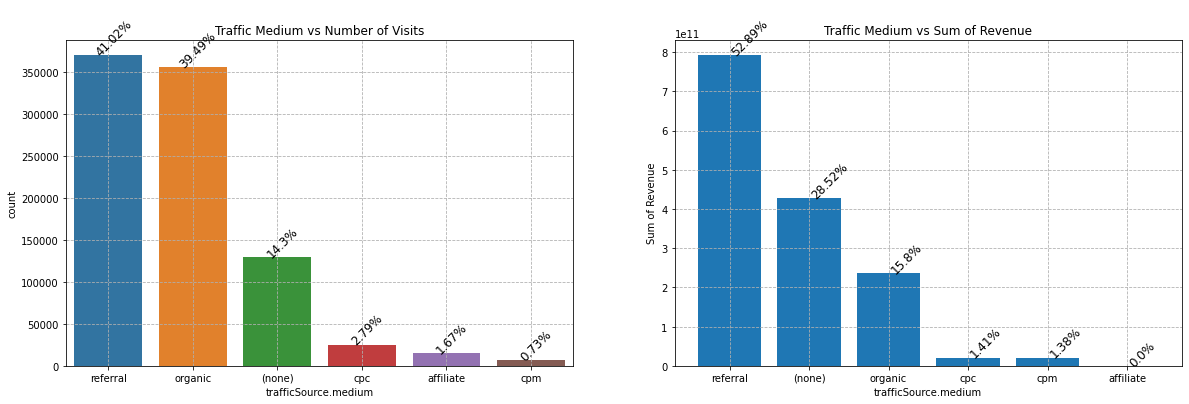

In [251]:
plt.rcParams["figure.figsize"] = (20,6)
#ax=sns.countplot(df['channelGrouping'],order = df['channelGrouping'].value_counts().index)

plt.subplot(121)
with plt.style.context('seaborn-poster'):
    ax=sns.countplot(df['trafficSource.medium'],order = df['trafficSource.medium'].value_counts().index)
    #fig = plot_figure(style_label=bmh)
    
for p in ax.patches:
    ax.annotate(f'\n{str(round(100*(p.get_height()/len(df.index)),2))+"%"}', (p.get_x()+0.4, p.get_height()+0.8), ha='center', color='black', size=12,rotation=45)
plt.grid(ls="--")
plt.title('Traffic Medium vs Number of Visits')
#plt.xticks(rotation=90)
print("Here (Not Set) stands for the Missing information") 

plt.subplot(122)
db=df.groupby('trafficSource.medium').sum()['totals.transactionRevenue'].sort_values(ascending=False)   
x=list(db.index)
y=list(db.values)
y1=list(db.values) # to calculate the percentage
plt.bar(x,height=y)
for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y1)),2))+"%",size=12,rotation=45)
plt.grid(ls="--")
plt.title('Traffic Medium vs Sum of Revenue')
plt.xlabel('trafficSource.medium')
#plt.xticks(rotation= 90)

plt.ylabel('Sum of Revenue')
plt.show()

#### Traffic Medium with most number of visits is referal, the same generates 51.19% of the revenue. Affiliate generates almost no revenue

## trafficSource.keyword

In [252]:
df['trafficSource.keyword'].value_counts()

(not provided)                     344997
6qEhsCssdK0z36ri                    10898
(Remarketing/Content targeting)      2600
google merchandise store             2130
1hZbAqLCbjwfgOH7                     2057
                                    ...  
yo tube                                23
youtube merchandise store              23
youtobe                                23
+women +sunglasses                     11
hoodie grey                             4
Name: trafficSource.keyword, Length: 282, dtype: int64

Here (Not Set) stands for the Missing information
And similarly we will have to treat (not available in demo dataset ) as missing information as well


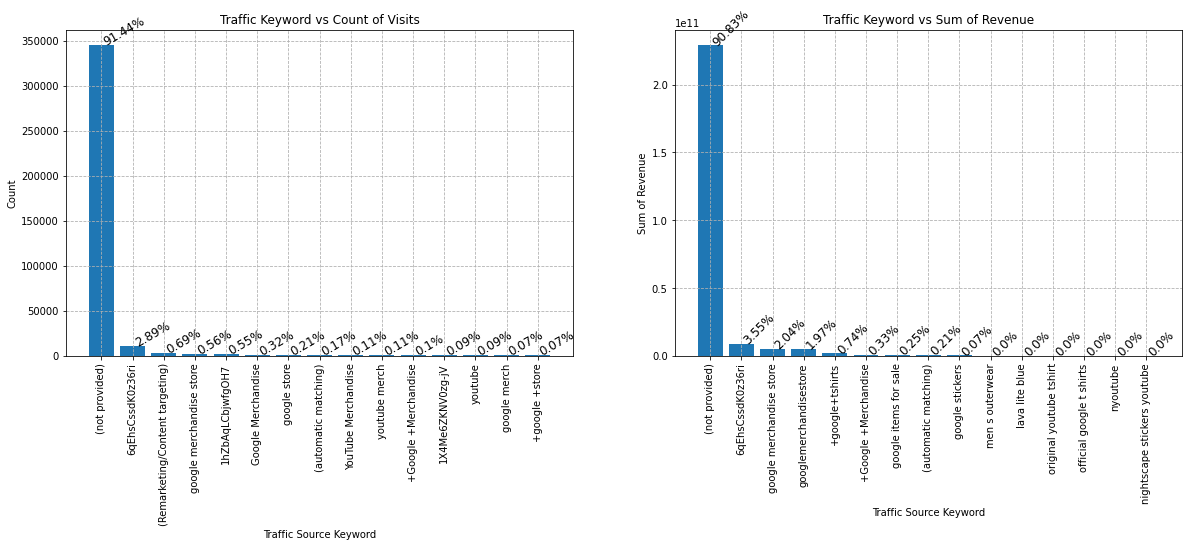

In [253]:
x=df['trafficSource.keyword'].value_counts().index[:15]
y=df['trafficSource.keyword'].value_counts().values[:15]
y1=df['trafficSource.keyword'].value_counts().values

plt.subplot(121)
plt.rcParams["figure.figsize"] = (20,6)
with plt.style.context("seaborn-poster"):
    plt.bar(x=x,height=y)

for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y1)),2))+"%",size=12,rotation=30)
print("Here (Not Set) stands for the Missing information")  
print("And similarly we will have to treat (not available in demo dataset ) as missing information as well")
plt.xticks(rotation=90)
plt.title('Traffic Keyword vs Count of Visits')
plt.xlabel('Traffic Source Keyword')
plt.ylabel('Count')
plt.grid(ls="--")

plt.subplot(122)
db=df.groupby('trafficSource.keyword').sum()['totals.transactionRevenue'].sort_values(ascending=False)   
x=list(db.index)[:15]
y=list(db.values)[:15]
y1=list(db.values) # to calculate the percentage
plt.bar(x,height=y)
for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y1)),2))+"%",size=12,rotation=45)
plt.grid(ls="--")
plt.title('Traffic Keyword vs Sum of Revenue')
plt.xlabel('Traffic Source Keyword')
plt.xticks(rotation= 90)

plt.ylabel('Sum of Revenue')
plt.show()
plt.show()

#### Most of the information is missing, this is feature might not be very useful.

## trafficSource.isTrueDirect

In [254]:
df['trafficSource.isTrueDirect'].unique()

array([nan, True], dtype=object)

In [255]:
df['trafficSource.isTrueDirect'].fillna('False',inplace=True)

In [256]:
df['trafficSource.isTrueDirect'].value_counts()

False    647224
True     256429
Name: trafficSource.isTrueDirect, dtype: int64

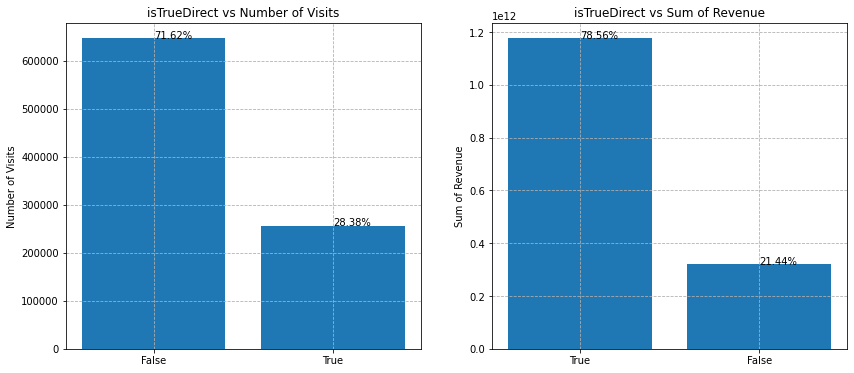

In [257]:
x=df['trafficSource.isTrueDirect'].value_counts().index
y=df['trafficSource.isTrueDirect'].value_counts().values
x=[str(i) for i in x]
plt.rcParams["figure.figsize"] = (14,6)
#with plt.style.context("seaborn-poster"):
plt.subplot(121)
plt.bar(x,height=y)
for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y)),2))+"%",size=10)

#plt.xticks([0,1],['Not a True Direct','True Direct'])
plt.ylabel('Number of Visits')

plt.title('isTrueDirect vs Number of Visits')
plt.grid(ls="--")

plt.subplot(122)
db=df.groupby('trafficSource.isTrueDirect').sum()['totals.transactionRevenue'].sort_values(ascending=False)   
x=list(db.index)
x=[str(i) for i in x]
y=list(db.values)
y1=list(db.values) # to calculate the percentage
plt.bar(x,height=y)
for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y1)),2))+"%",size=10)
plt.grid(ls="--")
plt.title('isTrueDirect vs Sum of Revenue')

#plt.xticks([0,1],['Not a True Direct','True Direct']) #plt.xticks([0,1],["Device is not a Mobile","Device is Mobile"])

plt.ylabel('Sum of Revenue')
plt.show()

#### This is also a very useful feature. Only 28.38% of the visits were True Direct, but they generated 68.39% of the total revenue

## trafficSource.referralPath

In [258]:
df['trafficSource.referralPath'].value_counts()

/yt/about/                                                                                                                                                      83953
/                                                                                                                                                               73067
/yt/about/vi/                                                                                                                                                   25988
/yt/about/tr/                                                                                                                                                   18683
/yt/about/th/                                                                                                                                                   16650
                                                                                                                                                                ...  
/fro

In [259]:
len(df['trafficSource.referralPath'].unique()) 

294

Here (Not Set) stands for the Missing information
And similarly we will have to treat (not available in demo dataset ) as missing information as well


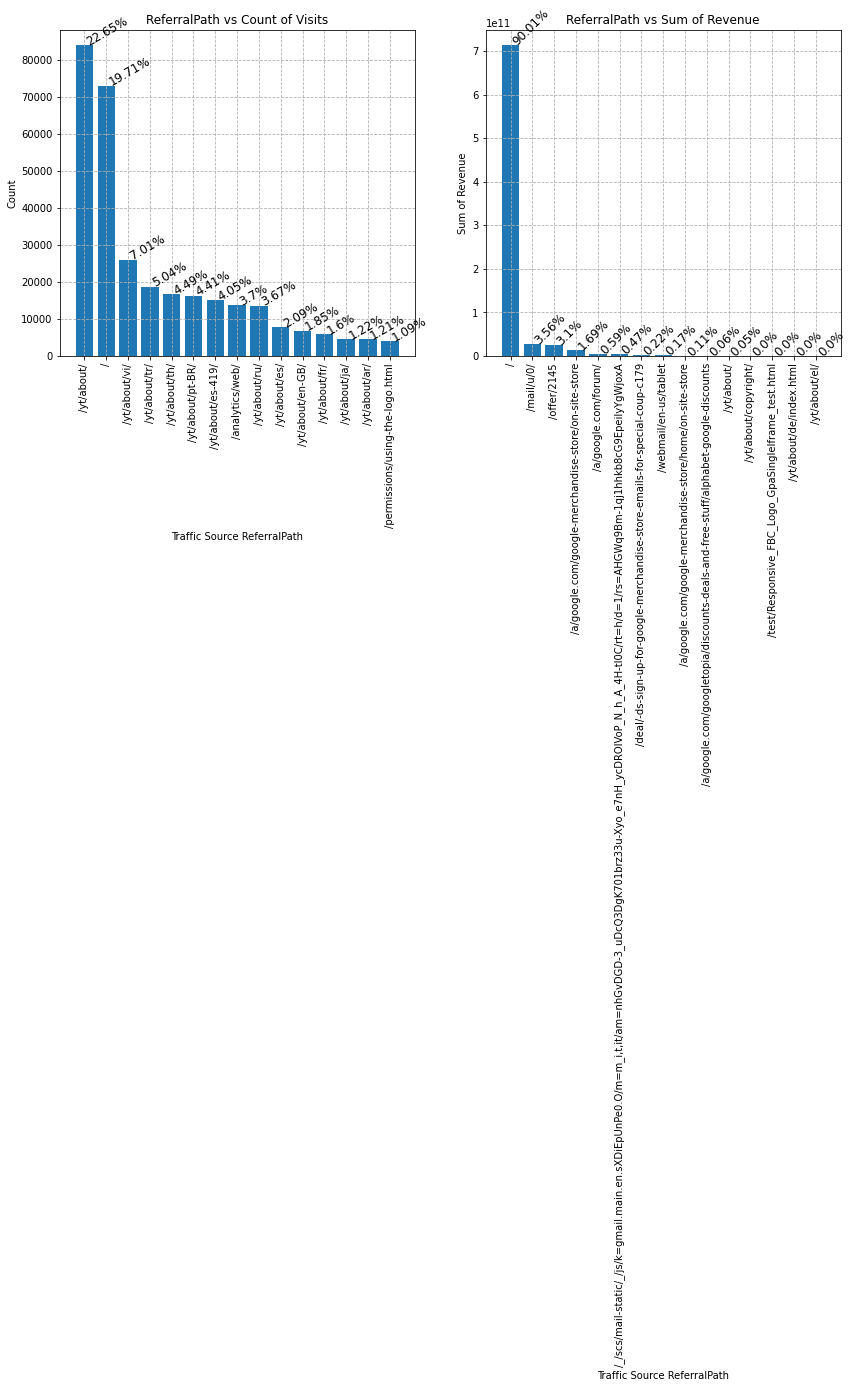

In [260]:
x=df['trafficSource.referralPath'].value_counts().index[:15]
y=df['trafficSource.referralPath'].value_counts().values[:15]
y1=df['trafficSource.referralPath'].value_counts().values

plt.subplot(121)
plt.rcParams["figure.figsize"] = (20,6)
with plt.style.context("seaborn-poster"):
    plt.bar(x=x,height=y)

for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y1)),2))+"%",size=12,rotation=30)
print("Here (Not Set) stands for the Missing information")  
print("And similarly we will have to treat (not available in demo dataset ) as missing information as well")
plt.xticks(rotation=90)
plt.title('ReferralPath vs Count of Visits')
plt.xlabel('Traffic Source ReferralPath')
plt.ylabel('Count')
plt.grid(ls="--")

plt.subplot(122)
db=df.groupby('trafficSource.referralPath').sum()['totals.transactionRevenue'].sort_values(ascending=False)   
x=list(db.index)[:15]
y=list(db.values)[:15]
y1=list(db.values) # to calculate the percentage
plt.bar(x,height=y)
for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y1)),2))+"%",size=12,rotation=45)
plt.grid(ls="--")
plt.title('ReferralPath vs Sum of Revenue')
plt.xlabel('Traffic Source ReferralPath')
plt.xticks(rotation= 90)

plt.ylabel('Sum of Revenue')
plt.show()
plt.show()

#### Referal Path seems to be a good information, because the visit having "\" as referal path, then most probably the revenue will be generated

# visitStartTime

In [261]:
#https://stackoverflow.com/questions/3682748/converting-unix-timestamp-string-to-readable-date

In [15]:
def process_time(posix_time):
    return datetime.utcfromtimestamp(posix_time).strftime('%Y-%m-%d %H:%M:%S')

df['visitStartTime']=df['visitStartTime'].apply(process_time)

def process_hour(time):
    return int(str(time)[-8:-6])

df['visitHour']=df['visitStartTime'].apply(process_hour)

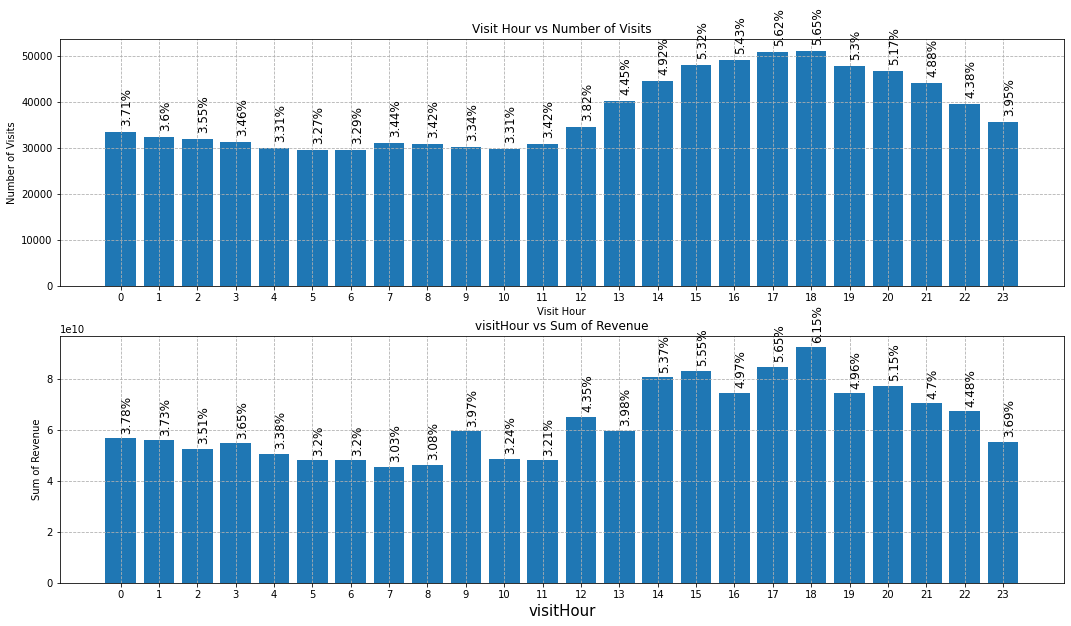

In [263]:
x=df['visitHour'].value_counts().index
y=df['visitHour'].value_counts().values

d = dict(zip(x,y))
dic = {}
for i in range(24):
    dic[i] = d[i]

plt.rcParams["figure.figsize"] = (18,10)
plt.subplot(211)
plt.bar(x=x,height=y)

for i,j in zip(dic.keys(),dic.values()):
    plt.text(i,j+2000,str(round(100*(j/sum(y)),2))+"%",size=12,rotation=90)

plt.grid(ls="--")
plt.xlabel('Visit Hour',size=10)
plt.ylabel('Number of Visits')
plt.xticks(list(range(0,24)))
plt.title('Visit Hour vs Number of Visits')

plt.subplot(212)
db=df.groupby('visitHour').sum()['totals.transactionRevenue']
x=list(db.index)
y=list(db.values)
y1=list(db.values) # to calculate the percentage
plt.bar(x,height=y)
for i,j in zip(x,y):
    plt.text(i,j+3000000000,str(round(100*(j/sum(y1)),2))+"%",size=12,rotation=90)
plt.grid(ls="--")
plt.title("visitHour vs Sum of Revenue")
plt.xlabel('visitHour',size=15)
plt.ylabel('Sum of Revenue')
plt.xticks(list(range(0,24)))
#|plt.xticks(size=14)
plt.savefig("Number_of_Visits.jpg")
plt.show()

#### 18, 17th and 15th is the busiest hour, where most of the visits happen, and revenue generation takes place

# Date

#### Date Format - Year, Month, Date

In [264]:
import datetime

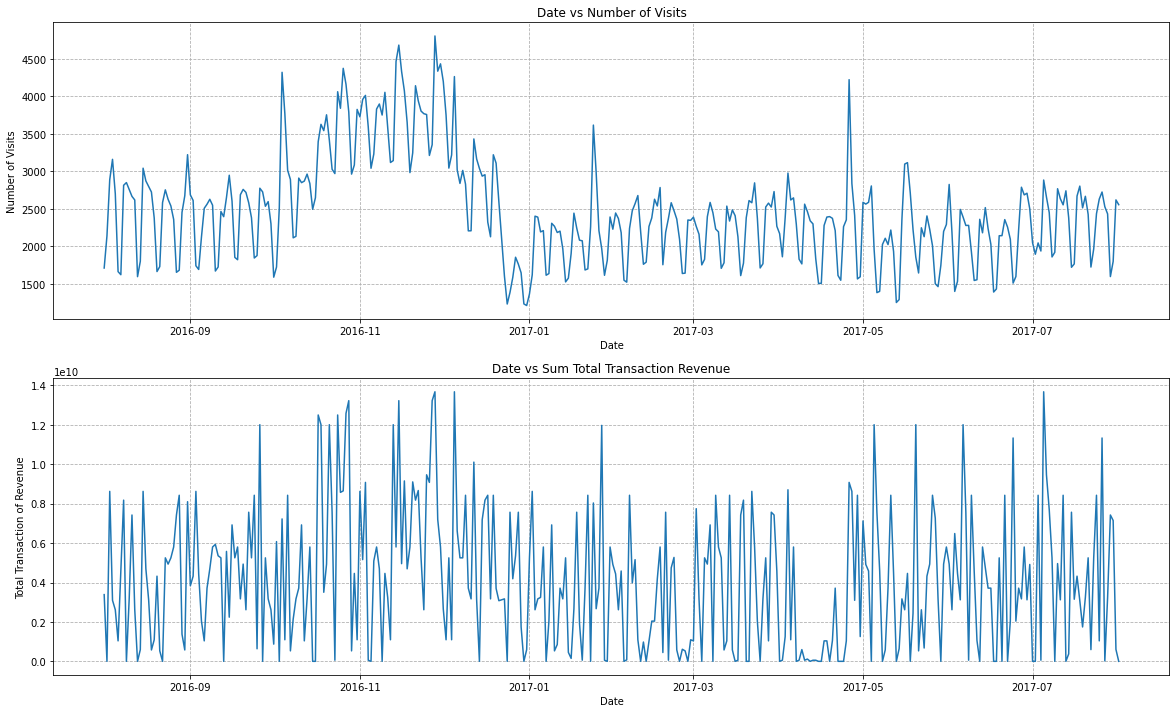

In [265]:
df['date']=pd.to_datetime(df["date"], infer_datetime_format=True, format="%Y%m%d")
df_date=df.groupby('date').count()
x=np.array(df_date.index)
y=np.array(df_date.fullVisitorId)
plt.rcParams["figure.figsize"] = (20,12)
plt.subplot(211)
plt.title('Date vs Number of Visits')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.plot(x,y)
plt.grid(ls='--')

plt.subplot(212)
df_date_sum=df.groupby('date').sum()
x=np.array(df_date_sum.index)
y=np.array(df_date_sum['totals.transactionRevenue'])
plt.title('Date vs Sum Total Transaction Revenue')
plt.xlabel('Date')
plt.ylabel('Total Transaction of Revenue')
plt.plot(x,y)
plt.grid(ls='--')

#### A pattern is not very clearly visible from the above plots

In [266]:
#df_m=df.groupby(pd.Grouper(key="date",freq='M')).count() # To count the number of visits
#df_m_s=df.groupby(pd.Grouper(key="date",freq='M')).sum()  # to count the sum of Total Transaction

df_m=df.groupby(pd.Grouper(freq='M', key="date")).count() # To count the number of visits
df_m_s=df.groupby(pd.Grouper(freq='M', key="date" )).sum()  # to count the sum of Total Transactiondf_m_s=df.groupby(pd.Grouper(freq='M' )).sum()  # to count the sum of Total Transaction

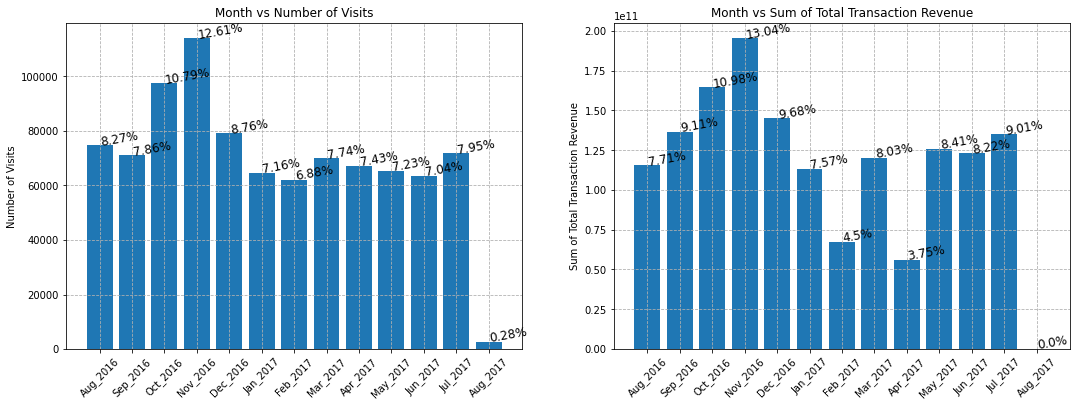

In [267]:
plt.rcParams["figure.figsize"] = (18,6)
m={'01':"Jan",'02':'Feb','03':'Mar','04':'Apr','05':'May','06':'Jun','07':'Jul','08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'}
x=np.array(df_m.index)
y=np.array(df_m.fullVisitorId.values)
l=[]
l1=[]
[l.append(str(i)[:7]) for i in x]
for i in l:
    l1.append(str(m[i[-2:]])+'_'+i[:4])
plt.subplot(121)
plt.bar(l1,height=y)
for i,j in zip(l1,y):
    plt.text(i,j,str(round(100*(j/sum(y)),2))+"%",size=12,rotation=10)
plt.xticks(rotation=45)
plt.grid(ls='--')
plt.title("Month vs Number of Visits")
plt.ylabel('Number of Visits')

plt.subplot(122)
x=np.array(df_m_s.index)
y=np.array(df_m_s['totals.transactionRevenue'].values)
l=[]
l1=[]
[l.append(str(i)[:7]) for i in x]
for i in l:
    l1.append(str(m[i[-2:]])+'_'+i[:4])
plt.bar(l1,height=y)
for i,j in zip(l1,y):
    plt.text(i,j,str(round(100*(j/sum(y)),2))+"%",size=12,rotation=10)
plt.xticks(rotation=45)
plt.grid(ls='--')
plt.title("Month vs Sum of Total Transaction Revenue")
plt.ylabel("Sum of Total Transaction Revenue")
plt.savefig('Month.jpg')
plt.show()

#### October, November and December are the busiest of the time, where most of the visits happen and most of the revenue is generated

In [268]:
df['date']=pd.to_datetime(df["date"], infer_datetime_format=True, format="%Y%m%d")

In [269]:
# https://stackoverflow.com/questions/47864691/pandas-group-by-weekday-m-t-w-t-f-s-s

In [270]:
df['weekday']=df['date'].dt.weekday

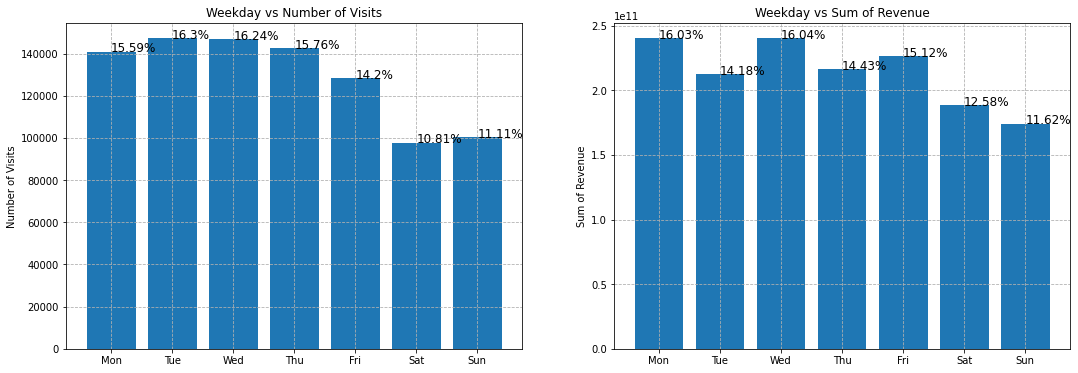

In [271]:
plt.rcParams["figure.figsize"] = (18,6)
plt.subplot(121)
df_w_c=df.groupby('weekday').count()
x=df_w_c.index
y=df_w_c.visitNumber
plt.bar(x,height=y)
for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y)),2))+"%",size=12,rotation=0)
plt.title('Weekday vs Number of Visits')
plt.ylabel('Number of Visits')
plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.grid(ls='--')

plt.subplot(122)
df_w_s=df.groupby('weekday').sum()
x=df_w_s.index
y=df_w_s['totals.transactionRevenue']
plt.bar(x,height=y)
for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y)),2))+"%",size=12,rotation=0)
plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Weekday vs Sum of Revenue')
plt.ylabel('Sum of Revenue')
plt.grid(ls='--')
plt.savefig("Weekday.jpg")
plt.show()

#### Saturday and Sunday , very less people tend to do shoping, may be because most of the people take rest over the weekends

In [272]:
df['year']=df['date'].dt.year

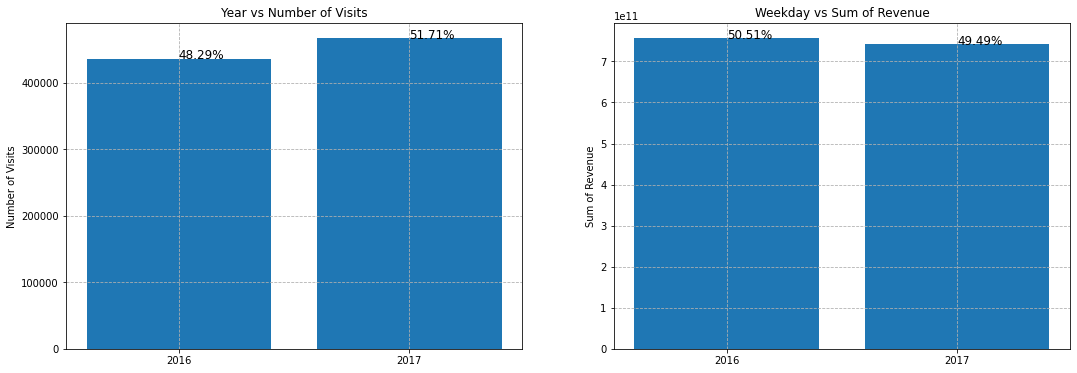

In [273]:
plt.subplot(121)
df_y_c=df.groupby('year').count()
x=df_y_c.index
y=df_y_c.visitNumber
plt.bar(x,height=y)
for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y)),2))+"%",size=12,rotation=0)
plt.title('Year vs Number of Visits')
plt.ylabel('Number of Visits')
plt.xticks([2016,2017])
plt.grid(ls='--')

plt.subplot(122)
df_y_s=df.groupby('year').sum()
x=df_y_s.index
y=df_y_s['totals.transactionRevenue']
plt.bar(x,height=y)
for i,j in zip(x,y):
    plt.text(i,j,str(round(100*(j/sum(y)),2))+"%",size=12,rotation=0)
plt.xticks([2016,2017])
plt.title('Weekday vs Sum of Revenue')
plt.ylabel('Sum of Revenue')
plt.grid(ls='--')
plt.show()


#### Year 2017 has more number of visits comapritively but has lesser amount of revenue generated.

### Dropping of 'sessionId' and 'visitId', because they dont hold any information regarding the Revenue Generated

In [5]:
df.drop(['sessionId','visitId'],axis=1,inplace=True)

In [6]:
df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'visitNumber',
       'visitStartTime', 'device.browser', 'device.operatingSystem',
       'device.isMobile', 'device.deviceCategory', 'geoNetwork.continent',
       'geoNetwork.subContinent', 'geoNetwork.country', 'geoNetwork.region',
       'geoNetwork.metro', 'geoNetwork.city', 'geoNetwork.networkDomain',
       'totals.hits', 'totals.pageviews', 'totals.bounces', 'totals.newVisits',
       'totals.transactionRevenue', 'trafficSource.campaign',
       'trafficSource.source', 'trafficSource.medium', 'trafficSource.keyword',
       'trafficSource.isTrueDirect', 'trafficSource.referralPath'],
      dtype='object')

### Train Data Summary

In [84]:
print('The Train Data ranges from ',df['date'].min().date(), 'to ',df['date'].max().date())
print('Hence the Train Data has ',df['date'].max().date()-df['date'].min().date(),' of data')

The Train Data ranges from  2016-08-01 to  2017-08-01
Hence the Train Data has  365 days, 0:00:00  of data


In [7]:
# Saving for further use
df.to_csv('preprocessed.csv')